# Pytorch : Dataset , Dataloader , nn.Linear 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

import torch
from   torch import nn
from torch.utils.data import Dataset,DataLoader

# DataLoader

In [2]:
class Dataset(Dataset):

    def __init__(self):
        
        # Self Input Dataset 
        m        = 1000
        n        = 1
        sigma    = 2
        density  = 0.2

        np.random.seed(1)
        beta_star = np.random.randn(n)
        idxs      = np.random.choice(range(n), int((1-density)*n), replace=False)

        for idx in idxs:
            beta_star[idx] = 0
        
        print(beta_star)
        """
        """
        
        X = np.random.randn(m,n).astype(np.float32)
        Y = X.dot(beta_star) + np.random.normal(0, sigma, size=m).astype(np.float32)
        # ---------- Generate Proxy Dataset , Convert ot Pytorch ---------- 
        self.data   =  torch.tensor(X)
        self.label  =  torch.tensor(Y)

    def __getitem__(self,index):
        return self.data[index].float(),self.label[index].float().reshape(-1)

    def __len__(self):
        return len(self.data)
    
    def get_input_dimmension(self):
        return self.data.size()[1]

In [3]:
batch_size      = 50
train_dataset   = Dataset()
test_dataset    = Dataset()

train_dataloader = DataLoader(dataset=train_dataset , batch_size=batch_size)
test_dataloader  = DataLoader(dataset=test_dataset  , batch_size=batch_size)

[1.62434536]
[1.62434536]


In [4]:
for i,(data,label) in enumerate(train_dataloader):
    print(f"iteration ({i+1})" + ", X_train Size :",data.size() , ", Y_train Size :",label.size())

iteration (1), X_train Size : torch.Size([50, 1]) , Y_train Size : torch.Size([50, 1])
iteration (2), X_train Size : torch.Size([50, 1]) , Y_train Size : torch.Size([50, 1])
iteration (3), X_train Size : torch.Size([50, 1]) , Y_train Size : torch.Size([50, 1])
iteration (4), X_train Size : torch.Size([50, 1]) , Y_train Size : torch.Size([50, 1])
iteration (5), X_train Size : torch.Size([50, 1]) , Y_train Size : torch.Size([50, 1])
iteration (6), X_train Size : torch.Size([50, 1]) , Y_train Size : torch.Size([50, 1])
iteration (7), X_train Size : torch.Size([50, 1]) , Y_train Size : torch.Size([50, 1])
iteration (8), X_train Size : torch.Size([50, 1]) , Y_train Size : torch.Size([50, 1])
iteration (9), X_train Size : torch.Size([50, 1]) , Y_train Size : torch.Size([50, 1])
iteration (10), X_train Size : torch.Size([50, 1]) , Y_train Size : torch.Size([50, 1])
iteration (11), X_train Size : torch.Size([50, 1]) , Y_train Size : torch.Size([50, 1])
iteration (12), X_train Size : torch.Size

# Training Parameters

In [5]:
class parameters():

    def __init__(self) :

        self.learning_rate = 0.1 
        self.epochs        = 1000
        self.criterion     = nn.MSELoss()

parameter = parameters()

# BUild Model

In [6]:
class LinearRegression(nn.Module):
    
    """
    input_dim --> regression features
    """
    
    def __init__(self,input_dim):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim,1)  
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

# Train Model

In [7]:
model     = LinearRegression(input_dim=train_dataset.get_input_dimmension())
optimizer = torch.optim.SGD(model.parameters(),lr=parameter.learning_rate)

for epoch in range(parameter.epochs):

    for i,(data,label) in enumerate(train_dataloader):
      
        y_pred = model(data)
        loss   = parameter.criterion(y_pred,label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 50 == 0:
        print('epoch {}, loss {}'.format(epoch+batch_size, loss.item()))


epoch 50, loss 4.13481330871582
epoch 100, loss 4.125975131988525
epoch 150, loss 4.125975131988525
epoch 200, loss 4.125975131988525
epoch 250, loss 4.125975131988525
epoch 300, loss 4.125975131988525
epoch 350, loss 4.125975131988525
epoch 400, loss 4.125975131988525
epoch 450, loss 4.125975131988525
epoch 500, loss 4.125975131988525
epoch 550, loss 4.125975131988525
epoch 600, loss 4.125975131988525
epoch 650, loss 4.125975131988525
epoch 700, loss 4.125975131988525
epoch 750, loss 4.125975131988525
epoch 800, loss 4.125975131988525
epoch 850, loss 4.125975131988525
epoch 900, loss 4.125975131988525
epoch 950, loss 4.125975131988525
epoch 1000, loss 4.125975131988525


# Parameters Weight [Alpha,Betas]

In [8]:
list(model.parameters())

[Parameter containing:
 tensor([[1.6951]], requires_grad=True),
 Parameter containing:
 tensor([-0.0264], requires_grad=True)]

# Save Model

In [9]:
torch.save(model.state_dict(), "LinearRegression.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


# Load Model

In [10]:
model     = LinearRegression(input_dim=train_dataset.get_input_dimmension())
model.load_state_dict(torch.load("LinearRegression.pth"))

<All keys matched successfully>

#  Test Model Accuracy

In [11]:
print("-"*30)
loss_list = [ ]
for i,(data,label) in enumerate(test_dataloader):
    # print(f"iteration ({i+1})" + ", X_train Size :",data.size() , ", Y_train Size :",label.size())

    y_pred = model(data)
    loss   = parameter.criterion(y_pred,label)
    print(f"loss {i*batch_size+batch_size} :",loss.item())

    loss_list.append(loss.item())

print("-"*30)
print("Average_Loss : ", np.mean(loss_list))

------------------------------
loss 50 : 5.093385219573975
loss 100 : 3.787928581237793
loss 150 : 3.780057907104492
loss 200 : 3.4567182064056396
loss 250 : 3.9926955699920654
loss 300 : 3.3249573707580566
loss 350 : 3.467958450317383
loss 400 : 4.591018199920654
loss 450 : 4.605863571166992
loss 500 : 6.141733169555664
loss 550 : 4.086453437805176
loss 600 : 4.460901737213135
loss 650 : 4.830617427825928
loss 700 : 5.82889461517334
loss 750 : 4.972119331359863
loss 800 : 4.000478267669678
loss 850 : 3.263093948364258
loss 900 : 3.4828906059265137
loss 950 : 3.8029162883758545
loss 1000 : 4.018982410430908
------------------------------
Average_Loss :  4.249483215808868


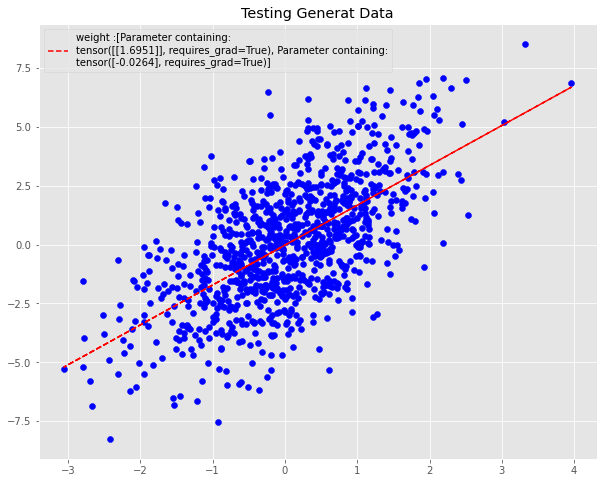

In [12]:
x,y = test_dataset[:,]

fig , ax = plt.subplots(figsize=(10,8))
ax.set_title('Testing Generat Data')
ax.scatter(x,y,color='blue')
ax.plot(x,model(x).detach().numpy(),color='red',linestyle='--',label=f'weight :{list(model.parameters())}')
ax.legend()